In [1]:
# импортируем библиотеки
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
import plotly.express as px
import category_encoders as ce

In [2]:
# загружаем данные
data = pd.read_csv(r'C:\Users\79654\Downloads\ds_salaries\ds_salaries.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [3]:
# проверяем данные на наличие пропусков
null = data.isnull().mean() * 100
display(null.sort_values(ascending=False))

Unnamed: 0            0.0
work_year             0.0
experience_level      0.0
employment_type       0.0
job_title             0.0
salary                0.0
salary_currency       0.0
salary_in_usd         0.0
employee_residence    0.0
remote_ratio          0.0
company_location      0.0
company_size          0.0
dtype: float64

In [4]:
# проверяем данные на наличие дупликатов
mask = data.duplicated(subset=data.columns)
duplicates = data[mask]
print(f'Число найденых дубликатов {duplicates.shape[0]}')

Число найденых дубликатов 0


In [5]:
# проверяем данные на неинформативные признаки 
low_inf_cols = list()

for col in data.columns:
    freq = data[col].value_counts(normalize=True).max()
    nunique = data[col].nunique() / data[col].count()
    if freq > 95.0:
        low_inf_cols.append(col)
        print(f'{col}: {round(freq*100, 2)} одинаковых значений')
    if nunique > 95.0:
        low_inf_cols.append(col)
        print(f'{col}: {round(nunique*100, 2)} уникальных значений')

In [6]:
# классифицируем все признаки на числовые и категориальные
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


У нас в таблице пять числовых и семь категориальных признаков 

### Вопрос 1. Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?

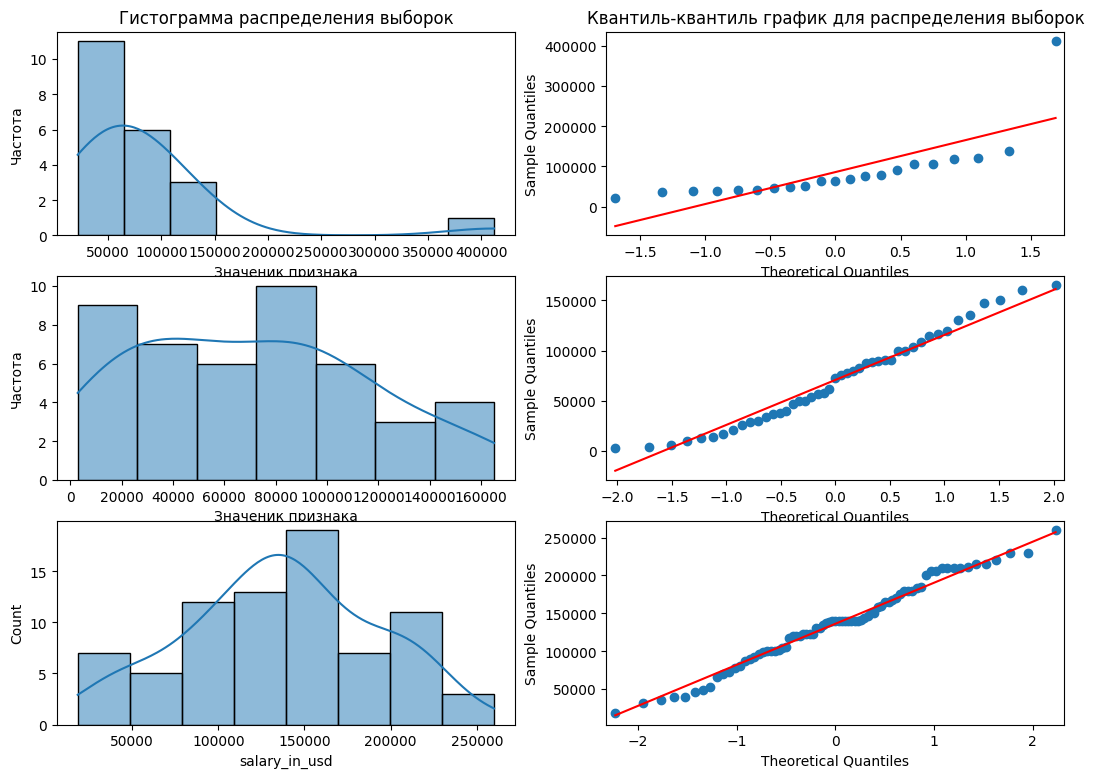

In [7]:
# проверяем выборки на нормальность с помощью визуализации
mask_year_1 = data['work_year'] == 2020
mask_job_1 = data['job_title'] == 'Data Scientist'
fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(13, 9))

sns.histplot(data['salary_in_usd'][mask_year_1 & mask_job_1], kde=True, ax=axes[0, 0])
axes[0, 0].set(xlabel='Значеник признака', ylabel='Частота')
axes[0, 0].set_title('Гистограмма распределения выборок')

sm.qqplot(data['salary_in_usd'][mask_year_1 & mask_job_1], line='s', ax=axes[0, 1])
axes[0, 1].set_title('Квантиль-квантиль график для распределения выборок');

mask_year_2 = data['work_year'] == 2021
mask_job_2 = data['job_title'] == 'Data Scientist'

sns.histplot(data['salary_in_usd'][mask_year_2 & mask_job_2], kde=True, ax=axes[1, 0])
axes[1, 0].set(xlabel='Значеник признака', ylabel='Частота')

sm.qqplot(data['salary_in_usd'][mask_year_2 & mask_job_2], line='s', ax=axes[1, 1]);

mask_year_3 = data['work_year'] == 2022
mask_job_3 = data['job_title'] == 'Data Scientist'

sns.histplot(data['salary_in_usd'][mask_year_3 & mask_job_3], kde=True, ax=axes[2, 0])
axes[1, 0].set(xlabel='Значеник признака', ylabel='Частота')

sm.qqplot(data['salary_in_usd'][mask_year_3 & mask_job_3], line='s', ax=axes[2, 1]);
# вывод распределение в первой выборке не нормальное

In [8]:
# проверяем выборки на нормальность с помощью теста
alpha = 0.05

mask_year_1 = data['work_year'] == 2020
mask_job_1 = data['job_title'] == 'Data Scientist'

_, p = stats.shapiro(data['salary_in_usd'][mask_year_1 & mask_job_1])
print('p_value = {:.3f}'.format(p))

if p <= alpha:
    print('Распределение первой выборки не нормальное')
else:
    print('Распределение первой выборки нормальное')

mask_year_2 = data['work_year'] == 2021
mask_job_2 = data['job_title'] == 'Data Scientist'

_, p = stats.shapiro(data['salary_in_usd'][mask_year_2 & mask_job_2])
print('p_value = {:.3f}'.format(p))

if p <= alpha:
    print('Распределение второй выборки не нормальное')
else:
    print('Распределение второй выборки нормальное')
    
mask_year_3 = data['work_year'] == 2022
mask_job_3 = data['job_title'] == 'Data Scientist'

_, p = stats.shapiro(data['salary_in_usd'][mask_year_3 & mask_job_3])
print('p_value = {:.3f}'.format(p))

if p <= alpha:
    print('Распределение третьей выборки не нормальное')
else:
    print('Распределение третьей выборки нормальное')
    
# вывод распределение в первой выборке не нормальное

p_value = 0.000
Распределение первой выборки не нормальное
p_value = 0.125
Распределение второй выборки нормальное
p_value = 0.327
Распределение третьей выборки нормальное


Проводим статистический тест для ответа на вопрос - Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?
- Нулевая гипотеза  a1 >= a2 >= a3
- Альтернативная гипотеза  a1 < a2 < a3


In [9]:
# у нас есть 3 независимые группы, в которых есть одна не нормально распределённая выборка, значит проводим тест "Критерий Краскела-Уоллиса"
alpha = 0.05

mask_year_1 = data['work_year'] == 2020
mask_job_1 = data['job_title'] == 'Data Scientist'
year_2020 = data['salary_in_usd'][mask_year_1 & mask_job_1]

mask_year_2 = data['work_year'] == 2021
mask_job_2 = data['job_title'] == 'Data Scientist'
year_2021 = data['salary_in_usd'][mask_year_1 & mask_job_1]

mask_year_3 = data['work_year'] == 2022
mask_job_3 = data['job_title'] == 'Data Scientist'
year_2022 = data['salary_in_usd'][mask_year_1 & mask_job_1]

_, p = stats.kruskal(year_2020, year_2021, year_2022)
print('p_value = {:.3f}'.format(p))

if p <= alpha:
    print('p_value меньше, чем заданый уровень значимости {:.2f}. Отвергаем нулевую гипотезу'.format(alpha))
else:
    print('p_value больше, чем заданый уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу'.format(alpha))

p_value = 1.000
p_value больше, чем заданый уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу


У нас недостаточно оснований отвергнуть нулевую гипотезу, поэтому мы можем сказать, что у специалистов Data Scientist не наблюдается ежегодный рост зарплат.

Почему у DS не наблюдается ежегодный рост зарплат? У нас в таблице имеются только три года (2020, 2021, 2022), изучив этот вопрос, я могу сказать, что в 2019 году роста у DS не было совсем, а уже в 2020 году был максимальный рост зарплат в 20%, далее в 2021 зарплаты выросли только на 10%, но количество вакансий на DS выросло на 120%, то-есть зарплаты не поспевают за ростом спроса. В 2022 году было примерно тоже самое, что и в 2021 году, скорее всего работадатели реагируют с некоторой задержкой. 

### Вопрос 2. Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?

In [10]:
# Узнаем сколько в среднем зарабатывают специалисты Data Engineer в 2022 году
# Чтобы выдвинуть предположение
mask_year = data['work_year'] == 2022
mask_job = data['job_title'] == 'Data Engineer'
data['salary_in_usd'][mask_year & mask_job].describe()
# в среднем они зарабатывают 126K за год

count        89.000000
mean     126375.696629
std       55954.398677
min       25000.000000
25%       78526.000000
50%      120000.000000
75%      160000.000000
max      324000.000000
Name: salary_in_usd, dtype: float64

In [11]:
# Узнаем сколько в среднем зарабатывают специалисты Data Scientist в 2022 году
# Чтобы выдвинуть предположение, кто больше зарабатывает
mask_year = data['work_year'] == 2022
mask_job = data['job_title'] == 'Data Scientist'
data['salary_in_usd'][mask_year & mask_job].describe()
# в среднем они зарабатывают 136K за год

count        77.000000
mean     136172.090909
std       54563.084740
min       18442.000000
25%      100000.000000
50%      140000.000000
75%      176000.000000
max      260000.000000
Name: salary_in_usd, dtype: float64

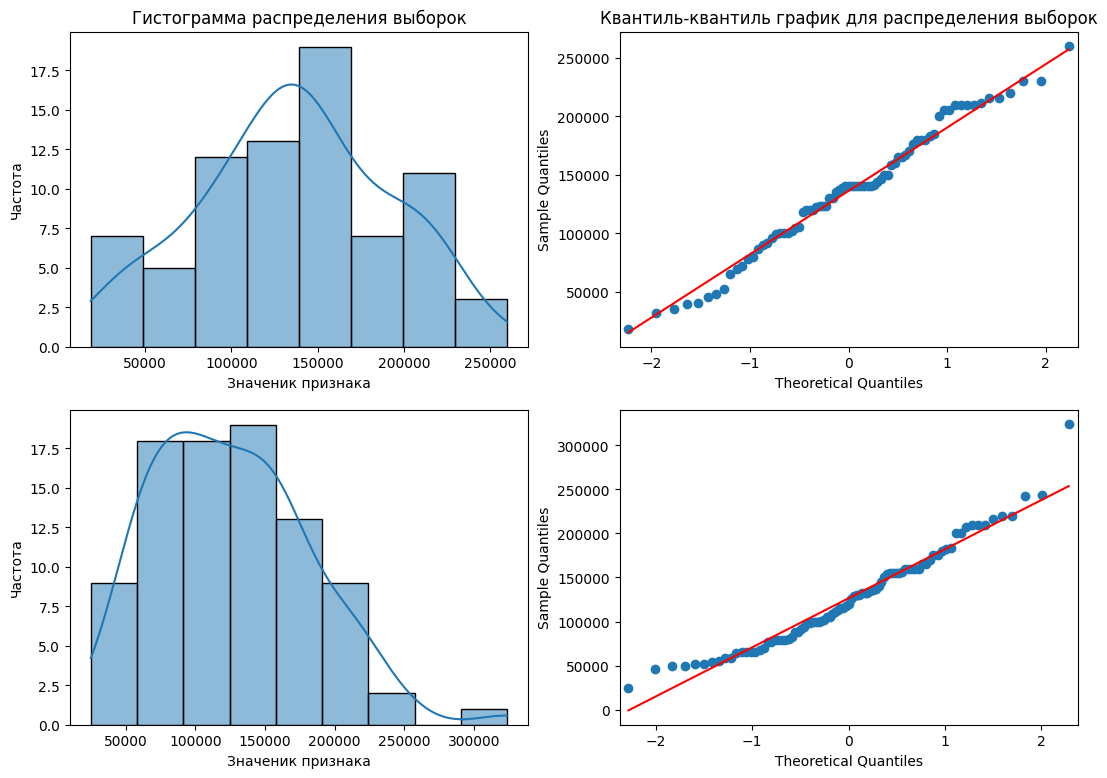

In [12]:
# проверяем выборки на нормальность с помощью визуализации
mask_year_1 = data['work_year'] == 2022
mask_job_1 = data['job_title'] == 'Data Scientist'
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(13, 9))

sns.histplot(data['salary_in_usd'][mask_year_1 & mask_job_1], kde=True, ax=axes[0, 0])
axes[0, 0].set(xlabel='Значеник признака', ylabel='Частота')
axes[0, 0].set_title('Гистограмма распределения выборок')

sm.qqplot(data['salary_in_usd'][mask_year_1 & mask_job_1], line='s', ax=axes[0, 1])
axes[0, 1].set_title('Квантиль-квантиль график для распределения выборок');

mask_year_2 = data['work_year'] == 2022
mask_job_2 = data['job_title'] == 'Data Engineer'

sns.histplot(data['salary_in_usd'][mask_year_2 & mask_job_2], kde=True, ax=axes[1, 0])
axes[1, 0].set(xlabel='Значеник признака', ylabel='Частота')

sm.qqplot(data['salary_in_usd'][mask_year_2 & mask_job_2], line='s', ax=axes[1, 1]);
# вывод распределение во второй выборке не нормальное

In [13]:
# проверяем выборки на нормальность с помощью теста
alpha = 0.05

mask_year_1 = data['work_year'] == 2022
mask_job_1 = data['job_title'] == 'Data Scientist'

_, p = stats.shapiro(data['salary_in_usd'][mask_year_1 & mask_job_1])
print('p_value = {:.3f}'.format(p))

if p <= alpha:
    print('Распределение первой выборки не нормальное')
else:
    print('Распределение первой выборки нормальное')

mask_year_2 = data['work_year'] == 2022
mask_job_2 = data['job_title'] == 'Data Engineer'

_, p = stats.shapiro(data['salary_in_usd'][mask_year_2 & mask_job_2])
print('p_value = {:.3f}'.format(p))

if p <= alpha:
    print('Распределение второй выборки не нормальное')
else:
    print('Распределение второй выборки нормальное')
# вывод распределение во второй выборке не нормальное

p_value = 0.327
Распределение первой выборки нормальное
p_value = 0.010
Распределение второй выборки не нормальное


Проводим статистический тест для ответа на вопрос - Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?

Наш вопрос будет выглядить так - Правда ли, что специалисты Data Scientist и специалисты Data Engineer зарабатывают одинаково?
- Нулевая гипотеза a1 = a2
- Альтернативная гипотеза a1 != a2

In [23]:
# У нас есть две независимые, не нормально распределённые группы, значит проводим тест "U-критерий Манна-Уитни"
alpha = 0.05

mask_year_1 = data['work_year'] == 2022
mask_job_1 = data['job_title'] == 'Data Scientist'
scientist = data['salary_in_usd'][mask_year_1 & mask_job_1]

mask_year_2 = data['work_year'] == 2022
mask_job_2 = data['job_title'] == 'Data Engineer'
engineer = data['salary_in_usd'][mask_year_1 & mask_job_1]

_, p = stats.mannwhitneyu(x=scientist, y=engineer)
print('p_value = {:.3f}'.format(p))

if p <= alpha:
    print('p_value меньше, чем заданый уровень значимости {:.2f}. Отвергаем нулевую гипотезу'.format(alpha))
else:
    print('p_value больше, чем заданый уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу'.format(alpha))

p_value = 1.000
p_value больше, чем заданый уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу


У нас нет оснований отвергнуть нулевую гипотезу, нулевая гипотеза в нашем вопросе выглядит как a1 = a2, тогда мы можем сказать, что специалисты Data Scientist и специалисты Data Engineer зарабатывают одинаково

### Вопрос 3. Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?

В небольших компаниях дата саинтесты в среднем зарабатывают 77633$
В средних по размеру компаниях дата саинтесты в среднем зарабатывают 116905$
В крупных компаниях дата саинтесты в среднем зарабатывают 119243$


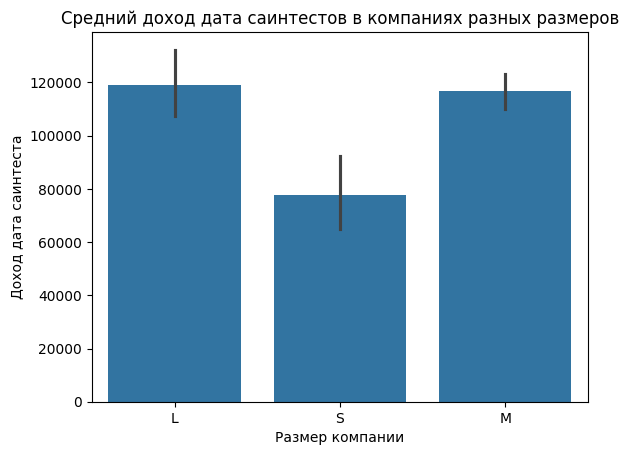

In [15]:
# Узнаем сколько в среднем зарабатывают Data Scientist в компаниях разных размеров, чтобы сформулировать гипотезу или предположение
s_salary = data['salary_in_usd'][data['company_size'] == 'S'].mean()
print('В небольших компаниях дата саинтесты в среднем зарабатывают {:.0f}$'.format(s_salary))

m_salary = data['salary_in_usd'][data['company_size'] == 'M'].mean()
print('В средних по размеру компаниях дата саинтесты в среднем зарабатывают {:.0f}$'.format(m_salary))

l_salary = data['salary_in_usd'][data['company_size'] == 'L'].mean()
print('В крупных компаниях дата саинтесты в среднем зарабатывают {:.0f}$'.format(l_salary))

bar = sns.barplot(data=data, x='company_size', y='salary_in_usd')
bar.set_title('Средний доход дата саинтестов в компаниях разных размеров');
bar.set_xlabel('Размер компании')
bar.set_ylabel('Доход дата саинтеста');
# Мы видим, что самый небольшой доход у дата саинтестов в компаниях небольших размеров, 
# доход в средних и крупных компаниях не сильно отличается, но в крупных компаниях доход немного больше.
# Из этого сформулируем предположение - Чем больше размер компании, тем больше доход дата саинтеста.

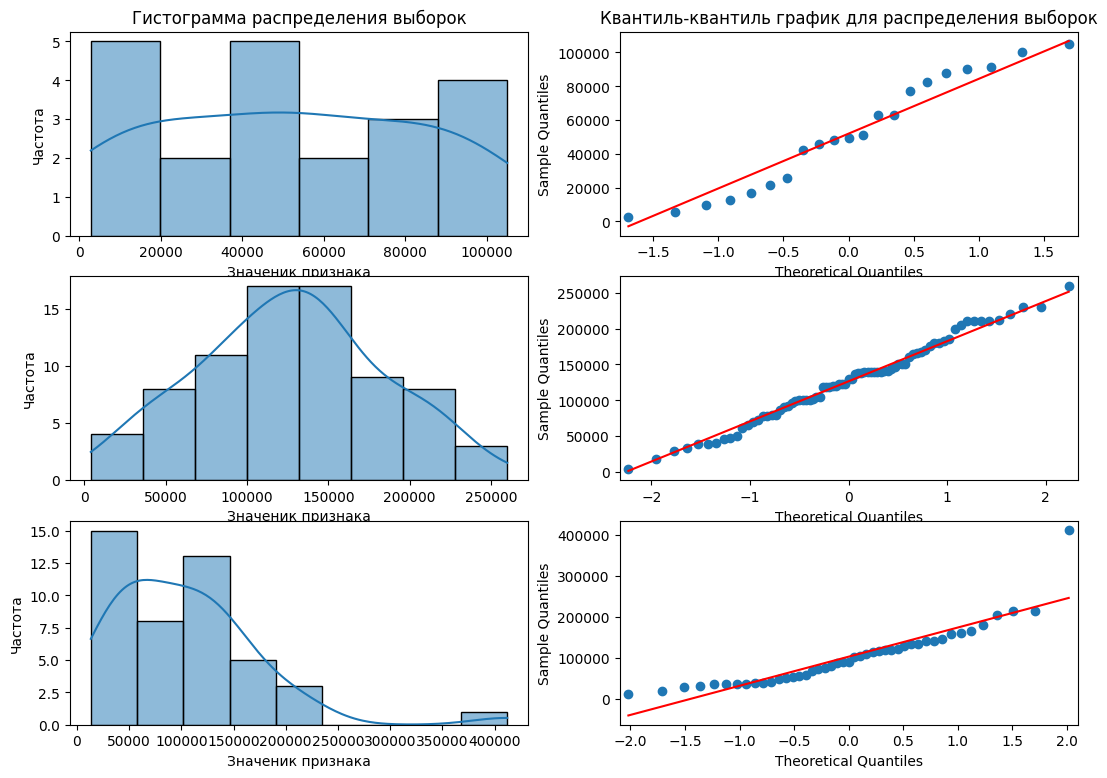

In [16]:
# проверяем выборки на нормальность с помощью визуализации

fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(13, 9))

mask_job_1 = data['job_title'] == 'Data Scientist'
mask_size_1 = data['company_size'] == 'S'

sns.histplot(data['salary_in_usd'][mask_job_1 & mask_size_1], kde=True, ax=axes[0, 0])
axes[0, 0].set(xlabel='Значеник признака', ylabel='Частота')
axes[0, 0].set_title('Гистограмма распределения выборок')

sm.qqplot(data['salary_in_usd'][mask_job_1 & mask_size_1], line='s', ax=axes[0, 1])
axes[0, 1].set_title('Квантиль-квантиль график для распределения выборок');

mask_job_2 = data['job_title'] == 'Data Scientist'
mask_size_2 = data['company_size'] == 'M'

sns.histplot(data['salary_in_usd'][mask_job_2 & mask_size_2], kde=True, ax=axes[1, 0])
axes[1, 0].set(xlabel='Значеник признака', ylabel='Частота')

sm.qqplot(data['salary_in_usd'][mask_job_2 & mask_size_2], line='s', ax=axes[1, 1]);

mask_job_3 = data['job_title'] == 'Data Scientist'
mask_size_3 = data['company_size'] == 'L'

sns.histplot(data['salary_in_usd'][mask_job_3 & mask_size_3], kde=True, ax=axes[2, 0])
axes[2, 0].set(xlabel='Значеник признака', ylabel='Частота')

sm.qqplot(data['salary_in_usd'][mask_job_3 & mask_size_3], line='s', ax=axes[2, 1]);
# вывод распределение в третьей выборке не нормальное

In [17]:
# проверяем выборки на нормальность с помощью теста
alpha = 0.05

mask_job_1 = data['job_title'] == 'Data Scientist'
mask_size_1 = data['company_size'] == 'S'

_, p = stats.shapiro(data['salary_in_usd'][mask_job_1 & mask_size_1])
print('p_value = {:.3f}'.format(p))

if p <= alpha:
    print('Распределение первой выборки не нормальное')
else:
    print('Распределение первой выборки нормальное')

mask_job_2 = data['job_title'] == 'Data Scientist'
mask_size_2 = data['company_size'] == 'M'

_, p = stats.shapiro(data['salary_in_usd'][mask_job_2 & mask_size_2])
print('p_value = {:.3f}'.format(p))

if p <= alpha:
    print('Распределение второй выборки не нормальное')
else:
    print('Распределение второй выборки нормальное')
    
mask_job_3 = data['job_title'] == 'Data Scientist'
mask_size_3 = data['company_size'] == 'L'
    
_, p = stats.shapiro(data['salary_in_usd'][mask_job_3 & mask_size_3])
print('p_value = {:.3f}'.format(p))

if p <= alpha:
    print('Распределение третьей выборки не нормальное')
else:
    print('Распределение третьей выборки нормальное')
# вывод распределение в третьей выборке не нормальное

p_value = 0.189
Распределение первой выборки нормальное
p_value = 0.639
Распределение второй выборки нормальное
p_value = 0.000
Распределение третьей выборки не нормальное


Проводим статистический тест для ответа на вопрос - Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?

Наш вопрос будет выглядить так - Правда ли что, чем больше размер компании, тем больше зарплата дата саинтеста?
- Нулевая гипотеза a1 >= a2 >= a3
- Альтернативная гипотеза a1 < a2 < a3 

In [18]:
# У нас есть три независимые, не нормально распределённые группы, значит проводим тест "Критерий Краскела-Уоллиса"
alpha = 0.05

mask_job = data['job_title'] == 'Data Scientist'

mask_size_1 = data['company_size'] == 'S'
s_size = data['salary_in_usd'][mask_job & mask_size_1]

mask_size_2 = data['company_size'] == 'M'
m_size = data['salary_in_usd'][mask_job & mask_size_2]

mask_size_3 = data['company_size'] == 'L'
l_size = data['salary_in_usd'][mask_job & mask_size_3]

_, p = stats.kruskal(s_size, m_size, l_size)
print('p_value = {:.3f}'.format(p))

if p <= alpha:
    print('p_value меньше, чем заданый уровень значимости {:.2f}. Отвергаем нулевую гипотезу'.format(alpha))
else:
    print('p_value больше, чем заданый уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу'.format(alpha))

p_value = 0.000
p_value меньше, чем заданый уровень значимости 0.05. Отвергаем нулевую гипотезу


Мы отвергаем нулевую гипотезу в сторону альтернативной, поэтому мы можем сказать, чем больше размер компании, тем больше зарплата у DS

Почему чем больше размер компании, тем больше зарплата у DS? Чем больше компания, тем больше она зарабатывает, значит и больше тратит на сотрудников и хороших дата саинтестов, ведь дата саинтесты могут сильно влиять на заработок компании, также они могут предовратить потерю денег

### Вопрос 4. Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

Проводим статистический тест для ответа на вопрос - Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

- Нулевая гипотеза: между наличием должностей Data Scientist и Data Engineer и размером компании **нет взаимосвязи**
- Альтернативная гипотеза: между наличием должностей Data Scientist и Data Engineer и размером компании **есть взаимосвязь**

In [19]:
# чтобы выявить связь между признаками нужно использовать тест "Хи-Квадрат"
alpha = 0.05

mask_job_1 = data['job_title'] == 'Data Scientist'
mask_job_2 = data['job_title'] == 'Data Engineer'

table = pd.crosstab(data['job_title'][mask_job_1 | mask_job_2], data['company_size'])

_, p, _, _ = stats.chi2_contingency(table)
print('p_value = {:.3f}'.format(p))

if p <= alpha:
    print('p_value меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p_value больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гиптотезу.'.format(alpha))

p_value = 0.008
p_value меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


Мы отвергаем нулевую гипотезу в сторону альтернативной. 
Между наличием должностей Data Scientist и Data Engineer и размером компании **нет взаимосвязи**

### Вопрос 5. Выяснить, какие факторы влияют на зарплату специалиста Data Scientist.

In [20]:
# сначала закодируем все категориальные признаки
data_c = data.copy()

ord_encoder = ce.OrdinalEncoder(mapping=[{'col': 'experience_level',
                                          'mapping': {'EN': 1, 'MI': 2, 'SE': 3, 'EX': 4}
                                          }])
data_c_exp = ord_encoder.fit_transform(data_c[['experience_level']])
data_c = pd.concat([data_c, data_c_exp], axis=1)

one_encoder = ce.OneHotEncoder(cols=['employment_type'], use_cat_names=True)
data_c_emp = one_encoder.fit_transform(data['employment_type'])
data_c = pd.concat([data_c_emp, data_c], axis=1)

ord_encoder = ce.OrdinalEncoder(mapping=[{'col': 'company_size',
                                          'mapping': {'S': 1, 'M': 2, 'L': 3}
                                          }])
data_c_com = ord_encoder.fit_transform(data_c[['company_size']])
data_c = pd.concat([data_c, data_c_com], axis=1)

In [21]:
data_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   employment_type_FT  607 non-null    int64 
 1   employment_type_CT  607 non-null    int64 
 2   employment_type_PT  607 non-null    int64 
 3   employment_type_FL  607 non-null    int64 
 4   Unnamed: 0          607 non-null    int64 
 5   work_year           607 non-null    int64 
 6   experience_level    607 non-null    object
 7   employment_type     607 non-null    object
 8   job_title           607 non-null    object
 9   salary              607 non-null    int64 
 10  salary_currency     607 non-null    object
 11  salary_in_usd       607 non-null    int64 
 12  employee_residence  607 non-null    object
 13  remote_ratio        607 non-null    int64 
 14  company_location    607 non-null    object
 15  company_size        607 non-null    object
 16  experience_level    607 no

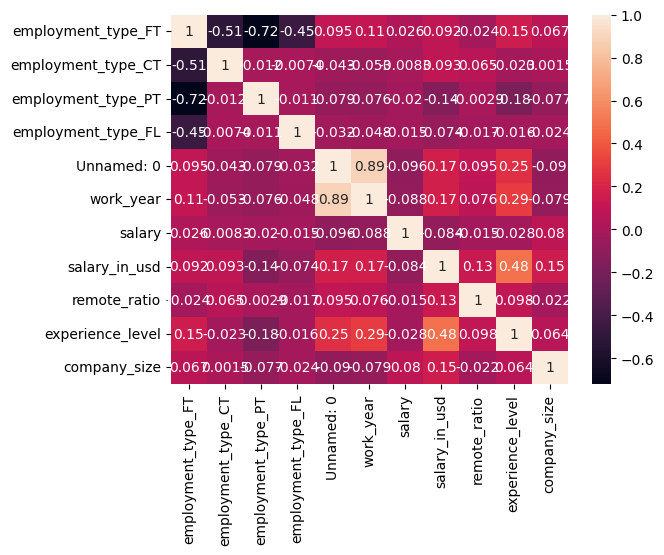

In [22]:
# Выполним корреляционный анализ данных
map = sns.heatmap(data_c.corr(numeric_only=True), annot=True)

Из этой тепловой таблицы мы видим, что на зарплату DS влияют 5 признаков: тип трудоустройства неполный рабочий день (корр. -0.14), год, в котором была выплачена зарплата (корр. 0.17), общий объем работы, выполняемой удаленно (корр. 0.13), Опыт работы на этой должности в течение года со следующими возможными значениями (корр. 0.48) и размер компании (корр. 0.15)

Из всех этих корреляционных значений, сильным является только (корр. 0.48) у признака "experience_level" (Опыт работы на этой должности в течение года со следующими возможными значениями). Поэтому можно сделать вывод, чем больше уровень текущей вакансии и будущей перспективы, тем больше зарплата у DS

Также можно разобрать остальные значения. 

1. Тип трудоустройства неполный рабочий день (корр. -0.14), это значение можно объяснить тем, что чаще работадателю требуется работник на полный рабочий день, поэтому на вакансию на неполный рабочий день оплата чуть меньше

2. Год, в котором была выплачена зарплата (корр. 0.17), это значение можно объяснить тем, что каждый год совсем немного проффесия DS становится всё более высокооплачиваемой и востребованной

3. Общий объем работы, выполняемой удаленно (корр. 0.13), здесь значение корреляции совсем небольшое, поэтому это можно списать на случайность или погрешность

4. Размер компании (корр. 0.15), это значение можно объяснить тем, что в больших компаниях зарплаты у DS больше

Большинство этих вопросов мы уже проверяли ранее с помощью статистических тестов, поэтому все эти суждения очень неоднозначные

### Дополнительное исследование

#### Вопрос 1. Правда ли, что DS в крупных по размеру компаниях зарабатывают больше, чем DS в средних по размеру компаниях?

В средних по размеру компаниях дата саинтесты в среднем зарабатывают 116905$
В крупных компаниях дата саинтесты в среднем зарабатывают 119243$


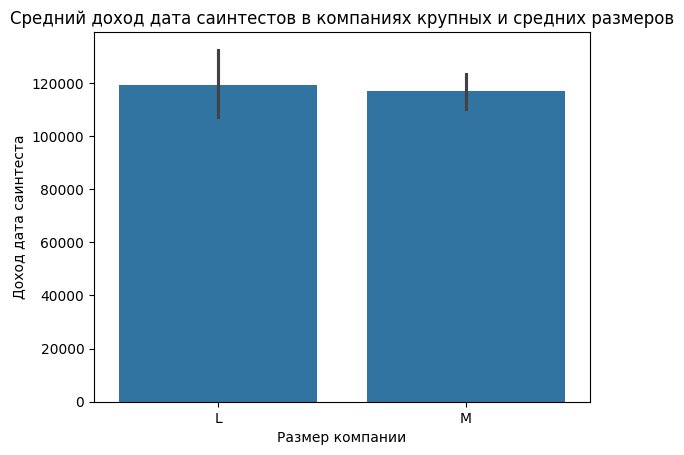

In [27]:
# Узнаем сколько в среднем зарабатывают Data Scientist в компаниях крупных и средних размеров
m_salary = data['salary_in_usd'][data['company_size'] == 'M'].mean()
print('В средних по размеру компаниях дата саинтесты в среднем зарабатывают {:.0f}$'.format(m_salary))

l_salary = data['salary_in_usd'][data['company_size'] == 'L'].mean()
print('В крупных компаниях дата саинтесты в среднем зарабатывают {:.0f}$'.format(l_salary))

size_l = data['company_size'] == 'L'
size_m = data['company_size'] == 'M'
bar = sns.barplot(data=data[size_l | size_m], x='company_size', y='salary_in_usd')
bar.set_title('Средний доход дата саинтестов в компаниях крупных и средних размеров');
bar.set_xlabel('Размер компании')
bar.set_ylabel('Доход дата саинтеста');

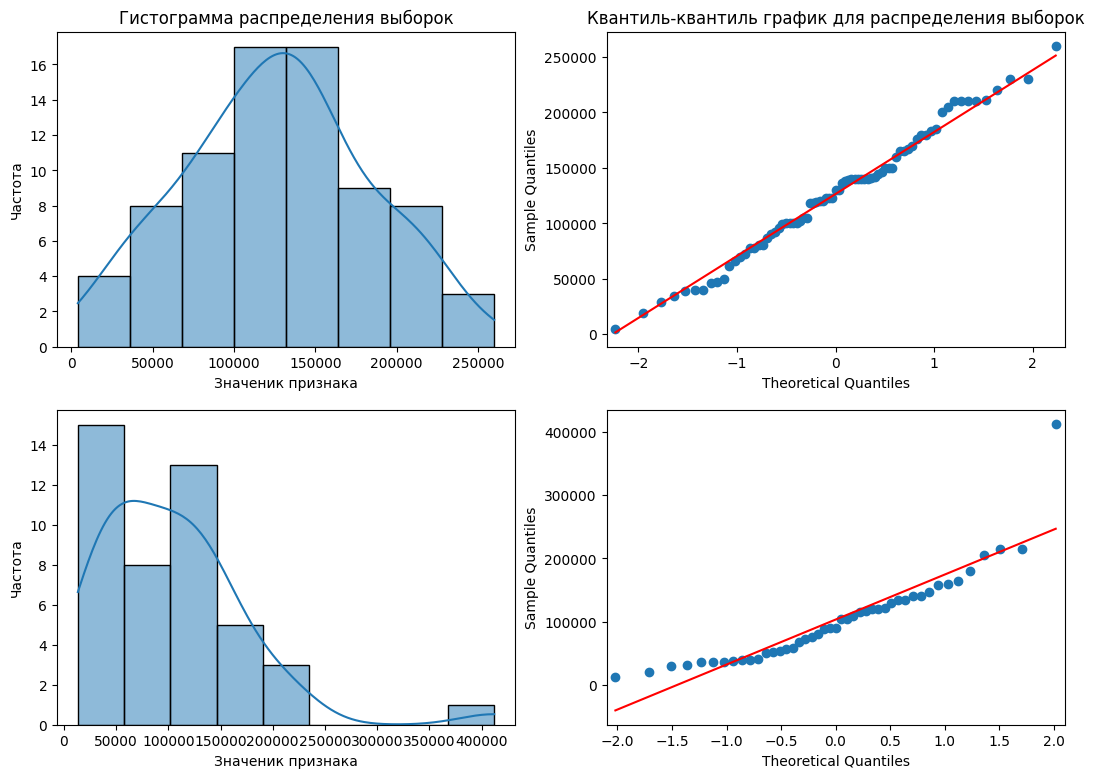

In [29]:
# проверим данные на нормальность с помощью визуализации
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(13, 9))

mask_job_1 = data['job_title'] == 'Data Scientist'
mask_size_1 = data['company_size'] == 'M'

sns.histplot(data['salary_in_usd'][mask_job_1 & mask_size_1], kde=True, ax=axes[0, 0])
axes[0, 0].set(xlabel='Значеник признака', ylabel='Частота')
axes[0, 0].set_title('Гистограмма распределения выборок')

sm.qqplot(data['salary_in_usd'][mask_job_1 & mask_size_1], line='s', ax=axes[0, 1]);
axes[0, 1].set_title('Квантиль-квантиль график для распределения выборок');

mask_job_2 = data['job_title'] == 'Data Scientist'
mask_size_2 = data['company_size'] == 'L'

sns.histplot(data['salary_in_usd'][mask_job_2 & mask_size_2], kde=True, ax=axes[1, 0])
axes[1, 0].set(xlabel='Значеник признака', ylabel='Частота')

sm.qqplot(data['salary_in_usd'][mask_job_2 & mask_size_2], line='s', ax=axes[1, 1]);
# вывод распределение во второй выборке не нормальное 

In [30]:
# проверяем выборки на нормальность с помощью теста
alpha = 0.05

mask_job_1 = data['job_title'] == 'Data Scientist'
mask_size_1 = data['company_size'] == 'M'

_, p = stats.shapiro(data['salary_in_usd'][mask_job_1 & mask_size_1])
print('p_value = {:.3f}'.format(p))

if p <= alpha:
    print('Распределение первой выборки не нормальное')
else:
    print('Распределение первой выборки нормальное')
    
mask_job_2 = data['job_title'] == 'Data Scientist'
mask_size_2 = data['company_size'] == 'L'
    
_, p = stats.shapiro(data['salary_in_usd'][mask_job_2 & mask_size_2])
print('p_value = {:.3f}'.format(p))

if p <= alpha:
    print('Распределение второй выборки не нормальное')
else:
    print('Распределение второй выборки нормальное')
# вывод распределение во второй выборке не нормальное

p_value = 0.639
Распределение первой выборки нормальное
p_value = 0.000
Распределение второй выборки не нормальное


Проводим статистический тест для ответа на вопрос - Правда ли, что DS в крупных по размеру компаниях зарабатывают больше, чем DS в средних по размеру компаниях?
- Нулевая гипотеза L <= M
- Альтернативная гипотеза L > M

In [32]:
# У нас есть две независимые выборки, которые распределены не нормально, значит используем тест "U-Критерий Манна-Уитни"
alpha = 0.05 

mask_job = data['job_title'] == 'Data Scientist'

mask_size_m = data['company_size'] == 'M'
m_ds = data['salary_in_usd'][mask_job & mask_size_m]

mask_size_l = data['company_size'] == 'L'
l_ds = data['salary_in_usd'][mask_job & mask_size_l]

_, p = stats.mannwhitneyu(m_ds, l_ds, alternative='greater')
print('p_value = {:.3f}'.format(p))

if p <= alpha:
    print('p_value меньше, чем заданый уровень значимости, значит отвергаем нулевую гипотезу')
else:
    print('p_value больше, чем заданый уровень значимости, у нас нет оснований отвергнуть нулевую гипотезу')

p_value = 0.006
p_value меньше, чем заданый уровень значимости, значит отвергаем нулевую гипотезу


Мы отвергаем нулевую гипотезу в пользу альтернативной, значит мы можем утверждать, что DS в крупных компаниях зарабатывают больше, чем в средних по размеру компаниях

#### Вопрос 2. Правда ли, что чем больше значение признака "experience_level" (Опыт работы на этой должности в течение года со следующими возможными значениями), тем больше зарплата DS?

C:\Users\79654\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\79654\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\Users\79654\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\79654\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: 

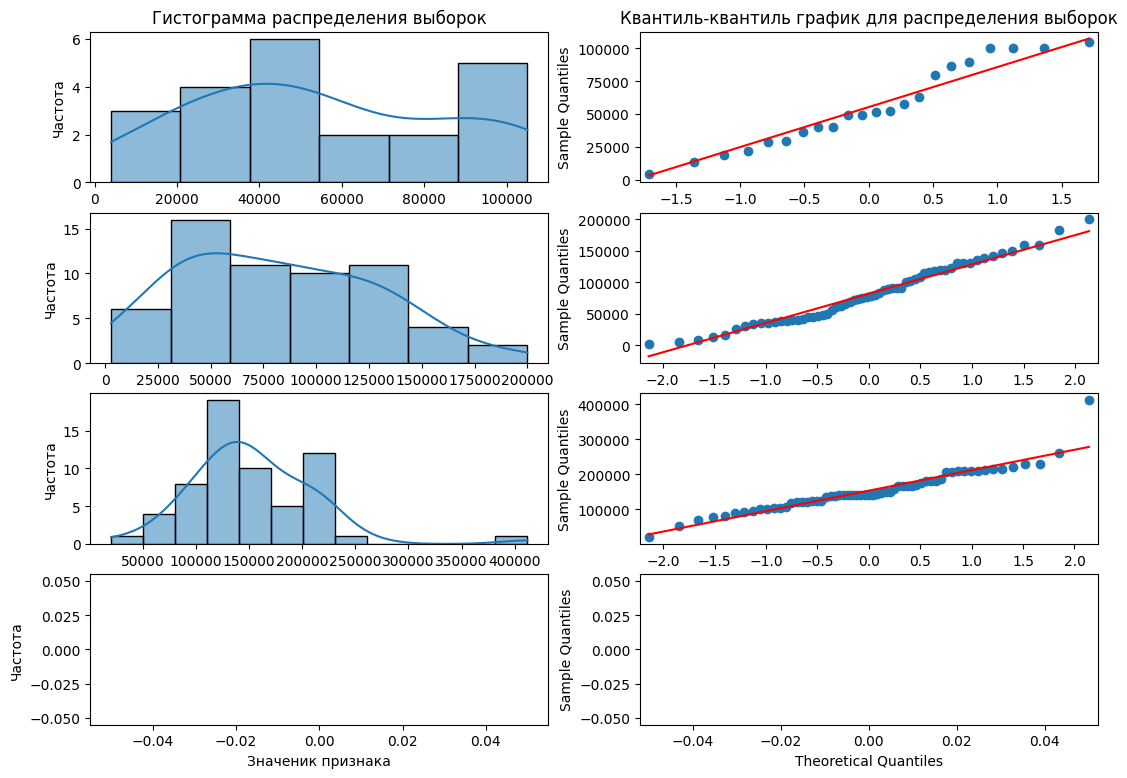

In [41]:
# проверяем данные на нормальность с помощью визуализации
fig, axes = plt.subplots(ncols=2, nrows=4, figsize=(13, 9))

mask_job = data['job_title'] == 'Data Scientist'

mask_exp_1 = data['experience_level'] == 'EN'

sns.histplot(data['salary_in_usd'][mask_job & mask_exp_1], kde=True, ax=axes[0, 0]);
axes[0, 0].set(xlabel='Значеник признака', ylabel='Частота');
axes[0, 0].set_title('Гистограмма распределения выборок');

sm.qqplot(data['salary_in_usd'][mask_job & mask_exp_1], line='s', ax=axes[0, 1]);
axes[0, 1].set_title('Квантиль-квантиль график для распределения выборок');

mask_exp_2 = data['experience_level'] == 'MI'

sns.histplot(data['salary_in_usd'][mask_job & mask_exp_2], kde=True, ax=axes[1, 0]);
axes[1, 0].set(xlabel='Значеник признака', ylabel='Частота');

sm.qqplot(data['salary_in_usd'][mask_job & mask_exp_2], line='s', ax=axes[1, 1]);

mask_exp_3 = data['experience_level'] == 'SE'

sns.histplot(data['salary_in_usd'][mask_job & mask_exp_3], kde=True, ax=axes[2, 0]);
axes[2, 0].set(xlabel='Значеник признака', ylabel='Частота');

sm.qqplot(data['salary_in_usd'][mask_job & mask_exp_3], line='s', ax=axes[2, 1]);

mask_exp_4 = data['experience_level'] == 'EX'

sns.histplot(data['salary_in_usd'][mask_job & mask_exp_4], kde=True, ax=axes[3, 0]);
axes[3, 0].set(xlabel='Значеник признака', ylabel='Частота');

sm.qqplot(data['salary_in_usd'][mask_job & mask_exp_4], line='s', ax=axes[3, 1]);
# вывод распределение в третьей выборке не нормальное 
# в четвертой строке у нас нет графиков, так как в таблице нету вакансий на DS с перспективой в директоры

In [51]:
# проверяем выборки на нормальность с помощью теста
alpha = 0.05

mask_job = data['job_title'] == 'Data Scientist'

mask_exp_1 = data['experience_level'] == 'EN'

_, p = stats.shapiro(data['salary_in_usd'][mask_job & mask_exp_1])
print('p_value = {:.3f}'.format(p))

if p <= alpha:
    print('Распределение первой выборки не нормальное')
else:
    print('Распределение первой выборки нормальное')
    
mask_exp_2 = data['experience_level'] == 'MI'
    
_, p = stats.shapiro(data['salary_in_usd'][mask_job & mask_exp_2])
print('p_value = {:.3f}'.format(p))

if p <= alpha:
    print('Распределение второй выборки не нормальное')
else:
    print('Распределение второй выборки нормальное')
    
mask_exp_3 = data['experience_level'] == 'SE'
    
_, p = stats.shapiro(data['salary_in_usd'][mask_job & mask_exp_3])
print('p_value = {:.3f}'.format(p))

if p <= alpha:
    print('Распределение третьей выборки не нормальное')
else:
    print('Распределение третьей выборки нормальное')

# вывод распределение в третьей выборке не нормальное

p_value = 0.174
Распределение первой выборки нормальное
p_value = 0.178
Распределение второй выборки нормальное
p_value = 0.000
Распределение третьей выборки не нормальное


Проводим тест для ответа на вопрос - Правда ли, что чем больше значение признака "experience_level" (Опыт работы на этой должности в течение года со следующими возможными значениями), тем больше зарплата DS?
- Нулевая гипотеза EN <= MI <= SE
- Альтернативная гипотеза EN > MI > SE

In [54]:
# У нас есть три независимые выборки, которые распределены не нормально, значит используем тест "Критерий Краскела Уоллиса"
alpha = 0.05

mask_job = data['job_title'] == 'Data Scientist'

mask_exp_1 = data['experience_level'] == 'EN'
en_ds = data['salary_in_usd'][mask_job & mask_exp_1]

mask_exp_2 = data['experience_level'] == 'MI'
mi_ds = data['salary_in_usd'][mask_job & mask_exp_2]

mask_exp_3 = data['experience_level'] == 'SE'
se_ds = data['salary_in_usd'][mask_job & mask_exp_3]

_, p = stats.kruskal(en_ds, mi_ds, se_ds)
print('p_value = {:.3f}'.format(p))

if p <= alpha:
    print('p_value меньше, чем заданый уровень значимости {:.2f}, значит отвергаем нулевую гипотезу'.format(alpha))
else:
    print('p_value больше, чем заданый уровень значимости {:.2f}, у нас нет оснований отвергнуть нулевую гипотезу'.format(alpha))

p_value = 0.000
p_value меньше, чем заданый уровень значимости 0.05, значит отвергаем нулевую гипотезу


Мы отвергаем нулевую гипотезу в сторону альтернативной, значит мы можем утверждать, что чем больше текущий опыт работы и будущая перспектива, тем больше зарплата DS

Почему чем больше текущий опыт работы и будущая перспектива, тем больше зарплата DS? Во всех компаниях, чем больше опыт работы DS, тем больше его зп., к примеру если у специалиста опыт работы 10 лет, это значит, что он уже очень опытен и ко всему готов, он может работать со сложными данными и всевозможными задачами 